# Collezione e confronto risultati

In [10]:
from joblib import load,dump
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
sns.set_style("whitegrid")
sns.set_palette("hsv")
#path
path_relazione = '../../relazione/img/'
path_output = '../output/'

In [11]:
problems = [['A-E','I-E']]
lines = ['GM12878','HelaS3','HepG2','K562']
models = ['rf','mpl']

In [12]:
problem = problems[0]
problem_slug = "_vs_".join(problem)
line = lines[0]
model = models[0]


In [13]:
def getDf(path_output,line,problem_slug,model):
    data = load(f'{path_output}{line}_{problem_slug}_best_result_{model}_epi.joblib')
    df = pd.DataFrame(data)
    df['AUCROC']=df['ROC'].map(lambda x: list(x)[0])
    df['f1-score']= df['PRC'].apply(lambda x: x[1])
    df['AUCPRC']= df['PRC'].apply(lambda x: x[0])
    df['model'] = df['PRC'].apply(lambda x : model if model != 'mpl' else 'mlp')
    df['line']= [line]*len(df['ROC'])
    df['nth-fold'] = [str(el+1) +"°" if el!='tot' else 'tot' for el in df.index.values]
    return df

In [14]:
df = pd.DataFrame()
for problem, line, model in product(problems,lines,models):
    problem_slug = "_vs_".join(problem)
    df = pd.concat([df,getDf(path_output,line,problem_slug,model)])

total_stat = df[df['nth-fold']=='tot']
total_stat

ROC                                       PRC    AUCROC  \
tot  {0.9824133308309775}  [0.9464591871951427, 0.9028054298642535]  0.982413   
tot  {0.9862594197462938}  [0.9565285043789478, 0.9144863915715541]  0.986259   
tot  {0.9662714553218341}  [0.8942248515172728, 0.8603003683763105]  0.966271   
tot  {0.9804059967547867}   [0.9183257283996578, 0.867383512544803]  0.980406   
tot  {0.9722654270043739}  [0.8627291586913451, 0.8192857142857143]  0.972265   
tot   {0.968226318698402}  [0.8681895166987152, 0.8352272727272727]  0.968226   
tot  {0.9629014382409311}   [0.8656390184155762, 0.847247990105133]  0.962901   
tot  {0.9749173628121205}  [0.9043034953120791, 0.8932944606413994]  0.974917   

     f1-score    AUCPRC model     line nth-fold  
tot  0.902805  0.946459    rf  GM12878      tot  
tot  0.914486  0.956529   mlp  GM12878      tot  
tot  0.860300  0.894225    rf   HelaS3      tot  
tot  0.867384  0.918326   mlp   HelaS3      tot  
tot  0.819286  0.862729    rf    HepG2      tot  
tot  0.835227  0.868190   mlp    HepG2      tot  
tot  0.847248  0.865639    rf     K562      tot  
tot  0.893294  0.904303   mlp     K562      tot

/home/lucavecchi/uni/bioinfo/progetto/venv/lib64/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


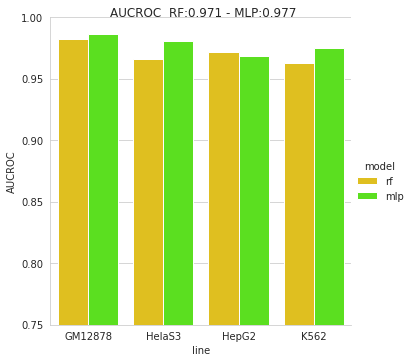

In [15]:

rf_tot_roc = total_stat[total_stat["model"] =="rf"]['AUCROC'].mean()
mpl_tot_roc =  total_stat[total_stat["model"] =="mlp"]['AUCROC'].mean()
p = sns.factorplot(x='line', y='AUCROC',hue='model',data=total_stat,kind='bar')
p.fig.suptitle(f'AUCROC  RF:{rf_tot_roc:.3f} - MLP:{mpl_tot_roc:.3f}',y=1)
p.axes[0][0].set_ylim((0.75,1.0))
p.fig.savefig(f'{path_relazione}ROC_performance_rf_vs_mlp_on_{problem_slug}.pdf')

/home/lucavecchi/uni/bioinfo/progetto/venv/lib64/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


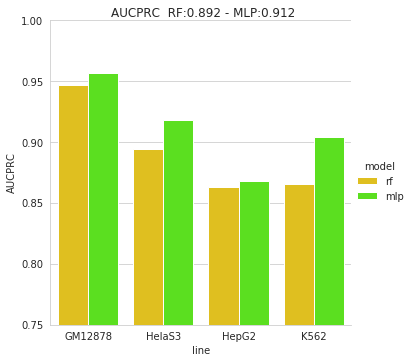

In [17]:
rf_tot_prc = total_stat[total_stat["model"] =="rf"]['AUCPRC'].mean()
mpl_tot_prc =  total_stat[total_stat["model"] =="mlp"]['AUCPRC'].mean()
p = sns.factorplot(x='line', y='AUCPRC',hue='model',data=total_stat,kind='bar')
p.fig.suptitle(f'AUCPRC  RF:{rf_tot_prc:.3f} - MLP:{mpl_tot_prc:.3f}',y=1)
p.axes[0][0].set_ylim((0.75,1.0))
p.fig.savefig(f'{path_relazione}PRC_performance_rf_vs_mlp_on_A-E_vs_I-E.pdf')

## Fissata il modello e il problema, osservo le prestazioni sulle linee

/home/lucavecchi/uni/bioinfo/progetto/venv/lib64/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/lucavecchi/uni/bioinfo/progetto/venv/lib64/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/lucavecchi/uni/bioinfo/progetto/venv/lib64/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the de

<Figure size 432x288 with 0 Axes>

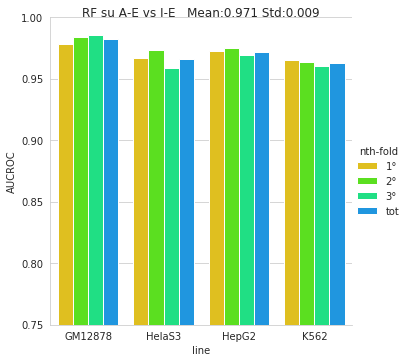

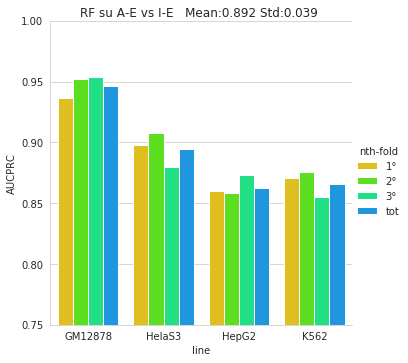

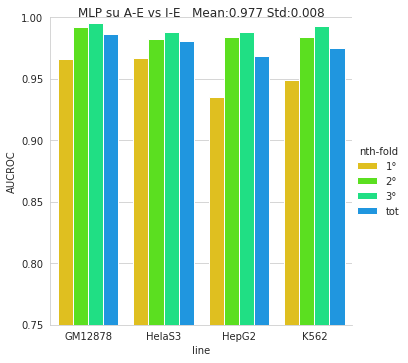

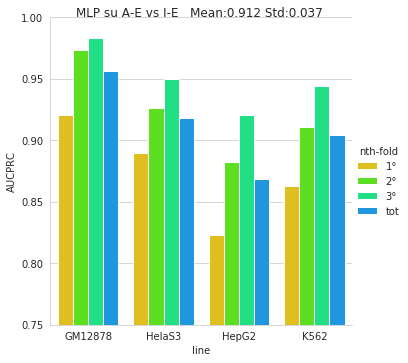

In [18]:
for count_1, model in enumerate(models):
    df = pd.DataFrame()
    for l in lines:
        
        df = pd.concat([df,getDf(path_output,l,problem_slug,model)])
    #refuso
    model = model if model!='mpl' else 'mlp'
    plt.figure(count_1*2)
    mean , std = df[df.index.values == 'tot'].describe()['AUCROC'][['mean','std']]
    fig = sns.factorplot(x='line', y='AUCROC',hue='nth-fold',data=df,kind='bar')
    fig.fig.suptitle(f'{model.upper()} su {" vs ".join(problem)}   Mean:{mean:.3f} Std:{std:.3f}',y=1)
    fig.axes[0][0].set_ylim((0.75,1.0))
    fig.fig.savefig(f'{path_relazione}ROC_performance_{model}_on_lines_on_A-E_vs_I-E.pdf')


    plt.figure(count_1*2 + 1)

    mean , std = df[df.index.values == 'tot'].describe()['AUCPRC'][['mean','std']]
    fmean , fstd = df[df.index.values == 'tot'].describe()['f1-score'][['mean','std']]
    fig = sns.factorplot(x='line', y='AUCPRC',hue='nth-fold',data=df,kind='bar')
    fig.fig.suptitle(f'{model.upper()} su {" vs ".join(problem)}   Mean:{mean:.3f} Std:{std:.3f} ',y=1)
    fig.axes[0][0].set_ylim((0.75,1.0))
    fig.fig.savefig(f'{path_relazione}PRC_performance_{model}_on_lines_on_A-E_vs_I-E.pdf')

## Collezione parametri

In [19]:
def getParamDF(model,problem_slug,line):
    if model =='rf':
        d = np.load(f'{path_output}{line}_{problem_slug}_best_param_{model}_epi.npy', allow_pickle=True).item()
        d = {'model':[model],
         'line':[line],
         'depth':[d['param_rf__max_depth']],
        'features': [d['param_rf__max_features']],
        'n_estim':[d['param_rf__n_estimators']]
        }
    else:
        h1,h2,h3,d1,d2 = np.load(f'{path_output}{line}_{problem_slug}_best_param_{model}_epi.npy', allow_pickle=True)
        d = {'model':['mlp'],
         'line':[line],
         'd1':[d1],
         'd2':[d2],
         'h1':[h1],
         'h2':[h2],
         'h3':[h3]
        }
    return pd.DataFrame(d)

In [31]:
latex = ""
for model in models:
    df_param = pd.DataFrame()
    for problem, line in product(problems,lines):
        problem_slug = "_vs_".join(problem)
        df_param = pd.concat([df_param,getParamDF(model,problem_slug,line)])
    latex +=df_param.to_latex(index=False,bold_rows=True)

with open(f'../../relazione/chapter/parameter_table.tex','w') as f:
    f.write(latex)